In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
# Load your dataset
df = pd.read_csv(r"C:\Users\71591\Desktop\dataset\AirPassengers.csv", parse_dates=['Month'], index_col='Month')

# Ensure the index is a datetime index
df.index = pd.to_datetime(df.index)

# Check the data
df


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


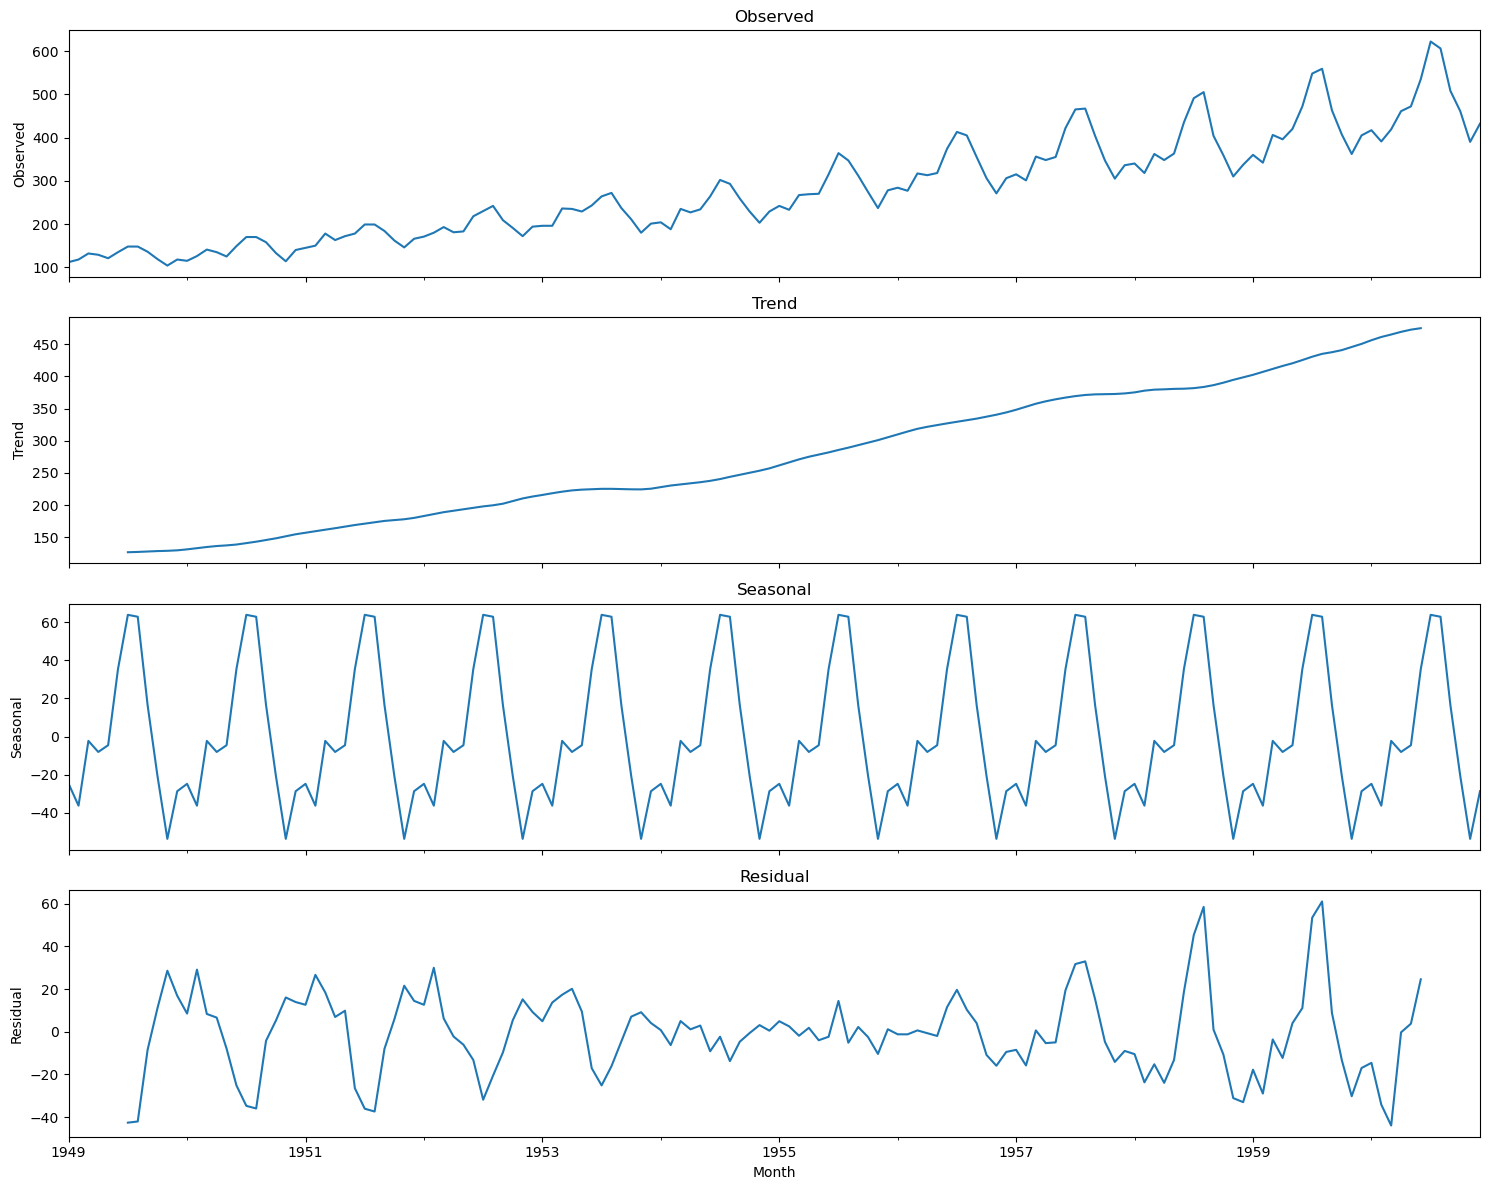

In [24]:
# Decompose the time series
result = seasonal_decompose(df['#Passengers'], model='additive') #period=12 by default 

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

result.observed.plot(ax=ax1, title='Observed')
ax1.set_ylabel('Observed')

result.trend.plot(ax=ax2, title='Trend')
ax2.set_ylabel('Trend')

result.seasonal.plot(ax=ax3, title='Seasonal')
ax3.set_ylabel('Seasonal')

result.resid.plot(ax=ax4, title='Residual')
ax4.set_ylabel('Residual')
ax4.set_xlabel('Month')

plt.tight_layout()
plt.show()


In [25]:
# Adding lag features to the DataFrame
for i in range(1,20):  # Creating lag features
    df[f'Lag_{i}'] = df['#Passengers'].shift(i)

# Drop rows with NaN values resulting from creating lag features
df.dropna(inplace=True)

# Display the first few rows of the dataframe after adding lag features
df.head()


,#Passengers,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12,Lag_13,Lag_14,Lag_15,Lag_16,Lag_17,Lag_18,Lag_19
Month,,,,,,,,,,,,,,,,,,,,
1950-08-01,170,170.0,149.0,125.0,135.0,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0,112.0
1950-09-01,158,170.0,170.0,149.0,125.0,135.0,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0
1950-10-01,133,158.0,170.0,170.0,149.0,125.0,135.0,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0
1950-11-01,114,133.0,158.0,170.0,170.0,149.0,125.0,135.0,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0
1950-12-01,140,114.0,133.0,158.0,170.0,170.0,149.0,125.0,135.0,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0


In [26]:
# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

# Define the input features (lag features) and target variable
x_train = train_data.drop(columns=['#Passengers'])
y_train = train_data['#Passengers']
x_test = test_data.drop(columns=['#Passengers'])
y_test = test_data['#Passengers']

# Display the shapes of the training and testing sets
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((100, 19), (100,), (25, 19), (25,))

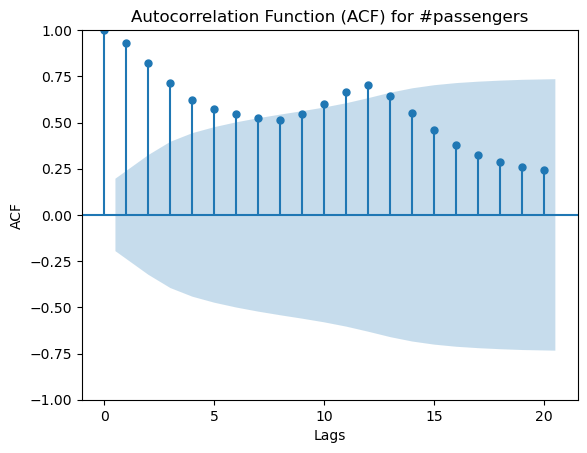

In [27]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF for the number of passengers in the training set
plot_acf(y_train)
plt.title('Autocorrelation Function (ACF) for #passengers')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()


In [28]:
# Calculate and print the correlation between ######------Passengers and each lagged value------------------------#####
for i in range(1, 20):
    correlation = df['#Passengers'].corr(df[f'Lag_{i}'])
    print(f"Correlation between #Passengers and Lag_{i}: {correlation:.4f}")

Correlation between #Passengers and Lag_1: 0.9492
Correlation between #Passengers and Lag_2: 0.8684
Correlation between #Passengers and Lag_3: 0.7969
Correlation between #Passengers and Lag_4: 0.7505
Correlation between #Passengers and Lag_5: 0.7392
Correlation between #Passengers and Lag_6: 0.7396
Correlation between #Passengers and Lag_7: 0.7439
Correlation between #Passengers and Lag_8: 0.7566
Correlation between #Passengers and Lag_9: 0.8016
Correlation between #Passengers and Lag_10: 0.8674
Correlation between #Passengers and Lag_11: 0.9443
Correlation between #Passengers and Lag_12: 0.9899
Correlation between #Passengers and Lag_13: 0.9438
Correlation between #Passengers and Lag_14: 0.8666
Correlation between #Passengers and Lag_15: 0.8004
Correlation between #Passengers and Lag_16: 0.7593
Correlation between #Passengers and Lag_17: 0.7489
Correlation between #Passengers and Lag_18: 0.7455
Correlation between #Passengers and Lag_19: 0.7455


In [29]:
#BUILDING THE MODEL 
from statsmodels.tsa.api import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define lag order based on the ACF plot
lag_order = 12 

# Create and train the autoregressive model
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [30]:
# Make predictions on the test set
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the evaluation metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 23.19
Root Mean Squared Error: 28.94


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


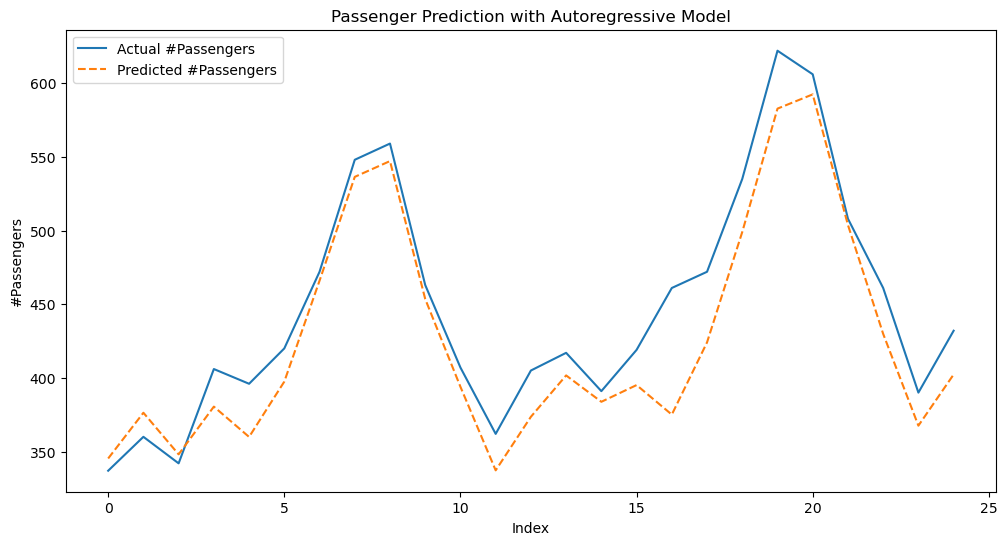

In [31]:
# Ensure the index for test_data is aligned correctly with y_pred
test_data.reset_index(drop=True, inplace=True)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual #Passengers')
plt.plot(test_data.index, y_pred, label='Predicted #Passengers', linestyle='--')
plt.xlabel('Index')
plt.ylabel('#Passengers')
plt.legend()
plt.title('Passenger Prediction with Autoregressive Model')
plt.show()

In [32]:
print(df.columns)


Index(['#Passengers', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6',
       'Lag_7', 'Lag_8', 'Lag_9', 'Lag_10', 'Lag_11', 'Lag_12', 'Lag_13',
       'Lag_14', 'Lag_15', 'Lag_16', 'Lag_17', 'Lag_18', 'Lag_19'],
      dtype='object')


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


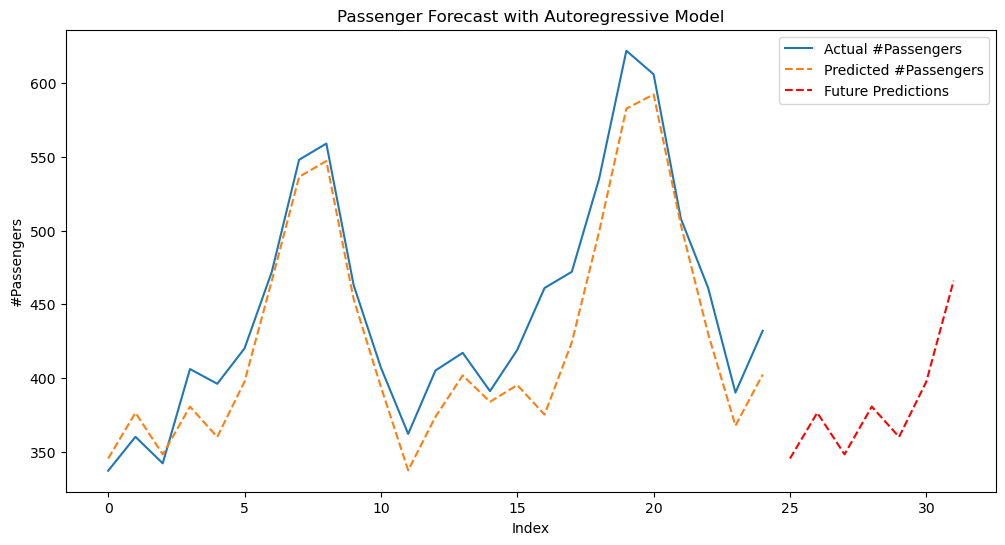

In [33]:
# Define the number of future time steps you want to predict
forecast_steps = 7

# Generate future indices
future_indices = range(len(y_test), len(y_test) + forecast_steps)

# Generate future predictions
future_predictions = ar_results.predict(start=len(train_data), end=len(train_data) + forecast_steps - 1, dynamic=False)

# Plot the actual data, existing predictions, and future predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual #Passengers')
plt.plot(range(len(y_test)), y_pred, label='Predicted #Passengers', linestyle='--')
plt.plot(future_indices, future_predictions[-forecast_steps:], label='Future Predictions', linestyle='--', color='red')
plt.xlabel('Index')
plt.ylabel('#Passengers')
plt.legend()
plt.title('Passenger Forecast with Autoregressive Model')
plt.show()